In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
boston = datasets.load_boston()
X = boston['data']
y = boston['target']

In [2]:
def standard_scaler(X):
    means=X.mean(0)
    std=X.std(0)
    return (X-means)/std

We saw in the GLM concept page that the gradient of the loss function (the negative log-likelihood) in a Poisson model is given by

∂L(β^)∂β^=X⊤(y^−y),
where

y^=exp(Xβ^).
The class below constructs Poisson regression using gradient descent with these results. Again, for simplicity we use a straightforward implementation of gradient descent with a fixed number of iterations and a constant learning rate.



In [17]:
class PoissonRegression:
    def fit(self,X,y,n_iter=1000, lr=0.0001,add_intercept=True,standardize=True):
        
        #record stuff
        if standardize:
            X=standard_scaler(X)
        if add_intercept:
            ones=np.ones(len(X)).reshape((len(X),1))
            X=np.concatenate((ones,X),axis=1)
        
        self.X=np.array(X)
        self.y=np.array(y)
        
        #fit
        beta_hats = np.zeros(X.shape[1])
        for i in range(n_iter):
            y_hat = np.exp(np.dot(X, beta_hats))
            dLdbeta = np.dot(X.T, y_hat - y)
            beta_hats -= lr*dLdbeta

        # save coefficients and fitted values
        self.beta_hats = beta_hats
        self.y_hat = y_hat
        

In [18]:
model=PoissonRegression()
model.fit(X,y)

<ipython-input-17-19b954ddacac>:17: RuntimeWarning: overflow encountered in exp
  y_hat = np.exp(np.dot(X, beta_hats))


/home/cezanek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


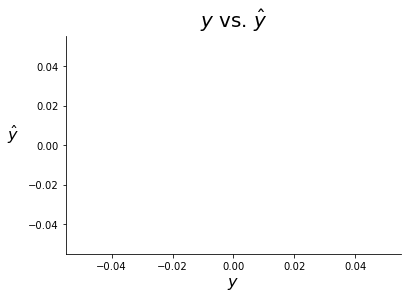

In [19]:
fig, ax = plt.subplots()
sns.scatterplot(model.y, model.y_hat)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()

In [21]:
#using python lib
import statsmodels.api as sm
X_constant=sm.add_constant(X)
poission=sm.GLM(y,X,family=sm.families.Poisson())
poission.fit();